# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [36]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [37]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,04/03/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,24/02/2019 04:29,33.44,2005065760003,57,Urban
3,Rodneyfort,10/02/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,06/03/2019 04:28,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [38]:
#  1. Get the total rides for each city type
total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [39]:
# 2. Get the total drivers for each city type
total_drivers_by_city_type = city_data_df.groupby(['type']).sum()['driver_count']
total_drivers_by_city_type


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [40]:
#  3. Get the total amount of fares for each city type
total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [41]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride_city_type = total_fares_by_city_type / total_rides_by_city_type
average_fare_per_ride_city_type


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [42]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver_city_type = total_fares_by_city_type / total_drivers_by_city_type
average_fare_per_driver_city_type


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [43]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides_by_city_type,
                                "Total Drivers": total_drivers_by_city_type,
                                "Total Fares": total_fares_by_city_type,
                                "Average Fare per Ride": average_fare_per_ride_city_type,
                                "Average Fare per Driver": average_fare_per_driver_city_type})

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [44]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [45]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df




,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [70]:
# 1. Read the merged DataFrame
pyber_data_df.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,04/03/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,24/02/2019 04:29,33.44,2005065760003,57,Urban
3,Rodneyfort,10/02/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,06/03/2019 04:28,34.58,3908451377344,46,Urban


In [82]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_type_df = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
date_type_df


fare
type  date                   
Rural 01/01/2019 09:45  43.69
      01/02/2019 08:59  17.05
      01/04/2019 09:32  21.63
      01/04/2019 13:39  26.73
      01/04/2019 16:37  54.65
...                       ...
Urban 31/03/2019 11:49  24.16
      31/03/2019 13:58  29.41
      31/03/2019 14:58   7.67
      31/03/2019 15:22  30.77
      31/03/2019 17:01  36.29

[2364 rows x 1 columns]

In [72]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
date_type_df = date_type_df.reset_index()
date_type_df.head()


,type,date,fare
0,Rural,01/01/2019 09:45,43.69
1,Rural,01/02/2019 08:59,17.05
2,Rural,01/04/2019 09:32,21.63
3,Rural,01/04/2019 13:39,26.73
4,Rural,01/04/2019 16:37,54.65


In [73]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_type_pivot = date_type_df.pivot(index="date", columns="type", values="fare")
date_type_pivot.head()


type,Rural,Suburban,Urban
date,,,
01/01/2019 00:08,NaN,NaN,37.91
01/01/2019 00:46,NaN,47.74,NaN
01/01/2019 02:07,NaN,24.07,NaN
01/01/2019 03:46,NaN,NaN,7.57
01/01/2019 05:23,NaN,NaN,10.75


In [75]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
date_range_january_april_2019_df = date_type_pivot.loc["01/01/2019":"28/04/2019"]
date_range_january_april_2019_df.head()


type,Rural,Suburban,Urban
date,,,
01/01/2019 00:08,NaN,NaN,37.91
01/01/2019 00:46,NaN,47.74,NaN
01/01/2019 02:07,NaN,24.07,NaN
01/01/2019 03:46,NaN,NaN,7.57
01/01/2019 05:23,NaN,NaN,10.75


In [76]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
date_range_january_april_2019_df.index = pd.to_datetime(date_range_jan_apr_2019_df.index)



In [77]:
# 7. Check that the datatype for the index is datetime using df.info()
date_range_january_april_2019_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2203 entries, 2019-01-01 00:08:00 to 2019-03-28 22:28:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  585 non-null    float64
 2   Urban     1505 non-null   float64
dtypes: float64(3)
memory usage: 68.8 KB


In [78]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_of_fares_week = date_range_january_april_2019_df.resample("W").sum()
sum_of_fares_week


type,Rural,Suburban,Urban
date,,,
2019-01-06,186.19,643.96,1325.22
2019-01-13,0.00,137.26,189.35
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,169.85,715.30,1115.87
2019-02-10,127.35,513.65,504.76
2019-02-17,70.04,753.29,1632.06
2019-02-24,419.06,1412.74,2466.29
2019-03-03,225.85,947.34,2163.24


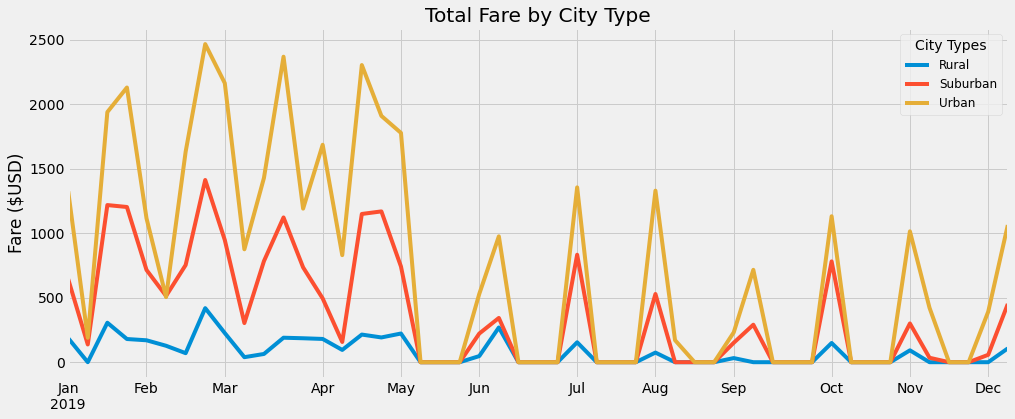

In [81]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

sum_fares_weekly.plot(figsize=(15,6))
plt.title("Total Fare by City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("")
lgnd = plt.legend(fontsize="12", mode="Expanded", 
                  loc="best", title="City Types")

# Save Figure
plt.savefig("analysis/PyBer_fare_summary.png")

# Show Figure
plt.show()


